In [1]:
import os
import re

import pandas as pd
import numpy as np

from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'

wv_data_file1 = 'regression_data_wv_cases1_causal_ma_detrend_20210301.csv'
# wv_data_file_lg_prov = 'regression_data_wv_cases1_causal_detrend_province_20_20210209.csv'
print(wv_data_file1)
df = pd.read_csv(data_dir + wv_data_file1)
print(df.shape)

wv_data_file = 'wv_cases1'
df1 = pd.read_csv(
    data_dir + 'regression_data_%s_causal_ma_detrend_8w_20210301.csv' % wv_data_file)
df2 = pd.read_csv(
    data_dir + 'regression_data_%s_causal_ma_detrend_12w_20210301.csv' % wv_data_file)
# df3 = pd.read_csv(
#     data_dir + 'regression_data_%s_causal_ma_detrend_8w_std_20210217.csv' % wv_data_file)

df.head()

regression_data_wv_cases1_causal_ma_detrend_20210301.csv
(6554, 60)


,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_plus_8,demand_shock_minus_1,demand_shock_minus_2,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8,yr_wk_float
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,NaN,NaN,0.000000,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,2018.02
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,NaN,0.000000,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,2018.03
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,NaN,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,2018.04
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,NaN,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,-0.368763,2018.05
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,NaN,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,-0.368763,0.000000,2018.06


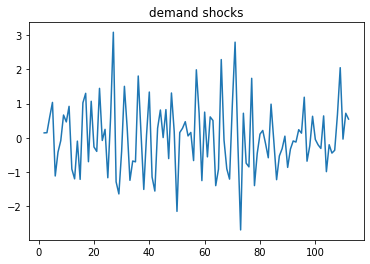

In [2]:
plt.plot(df.loc[df.province=='Bangkok', 'demand_shock'].reset_index(drop=True))
plt.title('demand shocks')
plt.show()

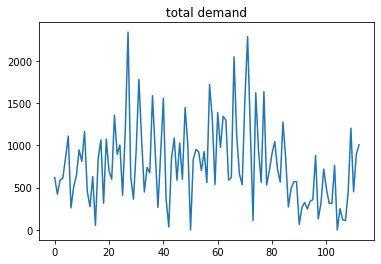

In [3]:
plt.plot(df.loc[df.province=='Bangkok', 'total_demand'].reset_index(drop=True))
plt.title('total demand')
plt.show()

In [4]:
df.loc[df.province=='Bangkok', 'total_demand'].max()-df.loc[df.province=='Bangkok', 'total_demand'].min()

2338.0

# basic, 4 week

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


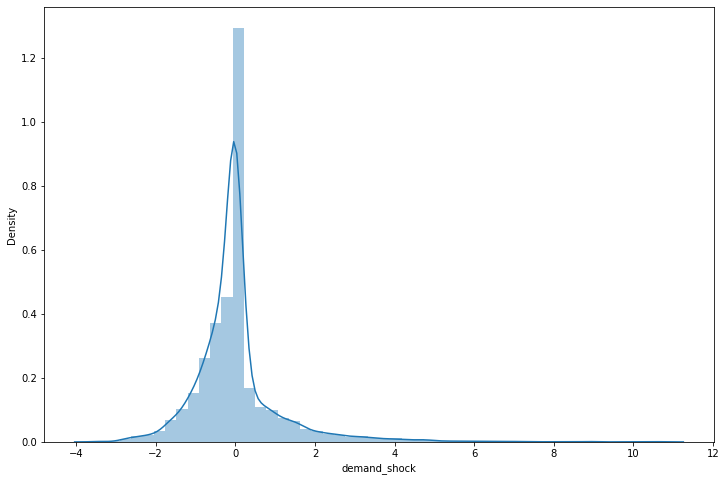

In [5]:
plt.figure(figsize=(12, 8))
sns.distplot(df['demand_shock'])
plt.show()

<Figure size 1152x864 with 0 Axes>

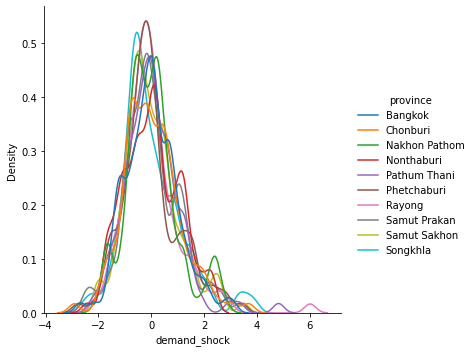

In [6]:
plt.figure(figsize=(16, 12))
biggest_provs = df.groupby('province').sum()['total_demand'].sort_values().tail(10).index
plot_data = df[df.province.isin(biggest_provs)]


sns.displot(data=plot_data, x="demand_shock", hue="province", kind="kde", bw_adjust=0.5, common_norm=False)
# plt.legend()
plt.show()

In [2]:
df['excess'] = df['demand_shock'] > 1
excess_frequency = df.groupby('province').sum()['excess']/df.groupby('province').count()['excess']
excess_frequency.sort_values(ascending=False).head(10)

province
Nonthaburi             0.194690
Phetchaburi            0.176991
Samut Prakan           0.176991
Samut Sakhon           0.159292
Songkhla               0.159292
Chonburi               0.159292
Nakhon Ratchasima      0.150442
Lopburi                0.150442
Nakhon Nayok           0.141593
Nakhon Si Thammarat    0.141593
Name: excess, dtype: float64

In [8]:
excess_frequency.sort_values(ascending=False).tail(10)

province
Satun           0.053097
Sakon Nakhon    0.053097
Nakhon Sawan    0.053097
Phetchabun      0.053097
Trat            0.044248
Narathiwat      0.026549
Uthai Thani     0.026549
Ranong          0.017699
Kalasin         0.017699
Si Saket        0.008850
Name: excess, dtype: float64

In [9]:
df.province.unique()

array(['Ang Thong', 'Bangkok', 'Buri Ram', 'Chachoengsao', 'Chainat',
       'Chaiyaphum', 'Chanthaburi', 'Chiang Mai', 'Chiang Rai',
       'Chonburi', 'Chumphon', 'Kalasin', 'Kamphaeng Phet',
       'Kanchanaburi', 'Khon Kaen', 'Krabi', 'Lampang', 'Lamphun',
       'Lopburi', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Ratchasima',
       'Nakhon Sawan', 'Nakhon Si Thammarat', 'Narathiwat', 'Nong Khai',
       'Nonthaburi', 'Pathum Thani', 'Phang Nga', 'Phetchabun',
       'Phetchaburi', 'Phitsanulok', 'Phra Nakhon Si Ayutthaya', 'Phrae',
       'Phuket', 'Prachin Buri', 'Prachuap Khiri Khan', 'Ranong',
       'Ratchaburi', 'Rayong', 'Sa Kaeo', 'Sakon Nakhon', 'Samut Prakan',
       'Samut Sakhon', 'Samut Songkhram', 'Saraburi', 'Satun', 'Si Saket',
       'Sing Buri', 'Songkhla', 'Sukhothai', 'Suphanburi', 'Surat Thani',
       'Tak', 'Trang', 'Trat', 'Udon Thani', 'Uthai Thani'], dtype=object)

In [3]:
df.perc_abuse.mean()

0.055717852700003734

In [4]:
df[df.wv_count>0].perc_abuse.mean()

0.20142019117254523

In [5]:
df['demand_shock'].mean(), df['demand_shock'].std()

(0.009706174821216558, 1.108650694731724)

In [6]:
excess_frequency.mean()

0.10558437595361611

In [11]:
df.excess.sum() / df.shape[0]

0.10558437595361611

In [13]:
total_abuse = sum(df['perc_abuse'] * df['wv_count'])
total_wv = sum(df['wv_count'])
print(total_abuse, total_wv, total_abuse/total_wv)

2178.0 9182.0 0.23720322369854063


In [16]:
8.19/0.23720322369854063, 18.7/0.23720322369854063

(34.527355371900825, 78.83535353535353)

In [17]:
8.19 + 23.720322369854063, 18.7+23.720322369854063

(31.910322369854065, 42.42032236985406)

# 8 week

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


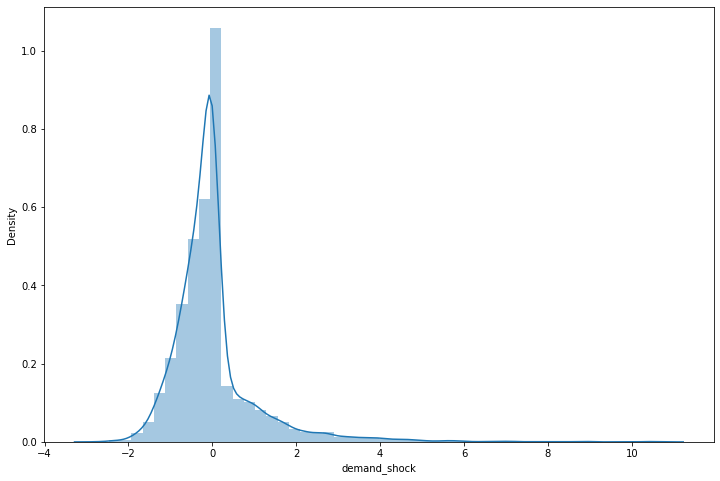

In [11]:
plt.figure(figsize=(12, 8))
sns.distplot(df1['demand_shock'])
plt.show()

<Figure size 1152x864 with 0 Axes>

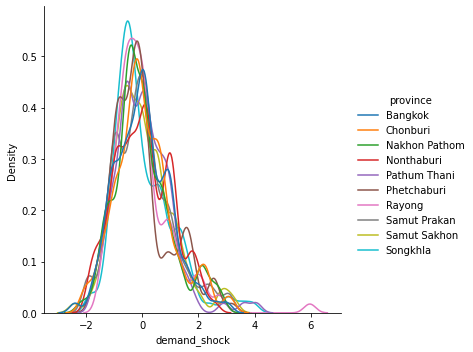

In [12]:
plt.figure(figsize=(16, 12))
biggest_provs = df1.groupby('province').sum()['total_demand'].sort_values().tail(10).index
plot_data = df1[df1.province.isin(biggest_provs)]


sns.displot(data=plot_data, x="demand_shock", hue="province", kind="kde", bw_adjust=0.5, common_norm=False)
# plt.legend()
plt.show()

In [13]:
df1['excess'] = df1['demand_shock'] > 1
excess_frequency = df1.groupby('province').sum()['excess']/df1.groupby('province').count()['excess']
excess_frequency.sort_values(ascending=False).head(10)

province
Nonthaburi             0.185841
Surat Thani            0.176991
Phetchaburi            0.176991
Songkhla               0.176991
Nakhon Ratchasima      0.159292
Samut Sakhon           0.159292
Lopburi                0.159292
Ratchaburi             0.159292
Nakhon Si Thammarat    0.150442
Chonburi               0.150442
Name: excess, dtype: float64

# 12 week

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


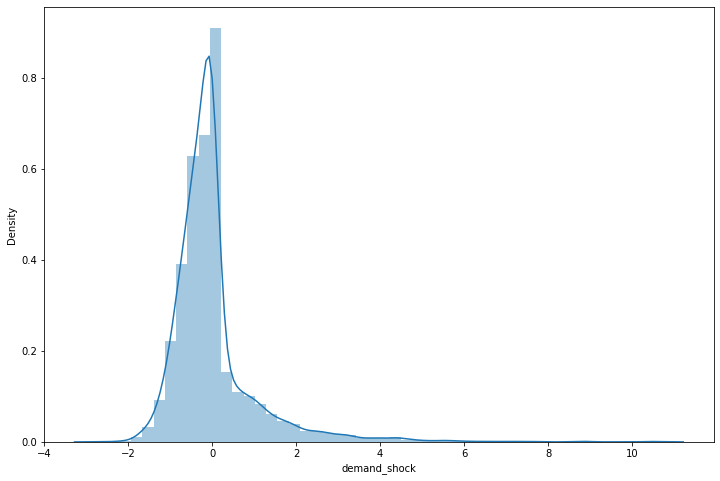

In [14]:
plt.figure(figsize=(12, 8))
sns.distplot(df2['demand_shock'])
plt.show()

<Figure size 1152x864 with 0 Axes>

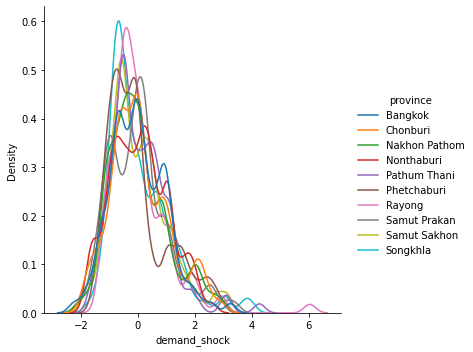

In [15]:
plt.figure(figsize=(16, 12))
biggest_provs = df2.groupby('province').sum()['total_demand'].sort_values().tail(10).index
plot_data = df2[df2.province.isin(biggest_provs)]


sns.displot(data=plot_data, x="demand_shock", hue="province", kind="kde", bw_adjust=0.5, common_norm=False)
# plt.legend()
plt.show()

In [16]:
df2['excess'] = df2['demand_shock'] > 1
excess_frequency = df2.groupby('province').sum()['excess']/df2.groupby('province').count()['excess']
excess_frequency.sort_values(ascending=False).head(10)

province
Nonthaburi             0.203540
Phetchaburi            0.194690
Chonburi               0.176991
Samut Sakhon           0.176991
Songkhla               0.168142
Nakhon Ratchasima      0.159292
Prachuap Khiri Khan    0.159292
Pathum Thani           0.159292
Ratchaburi             0.159292
Lopburi                0.150442
Name: excess, dtype: float64

# 8 week & std (discard)

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


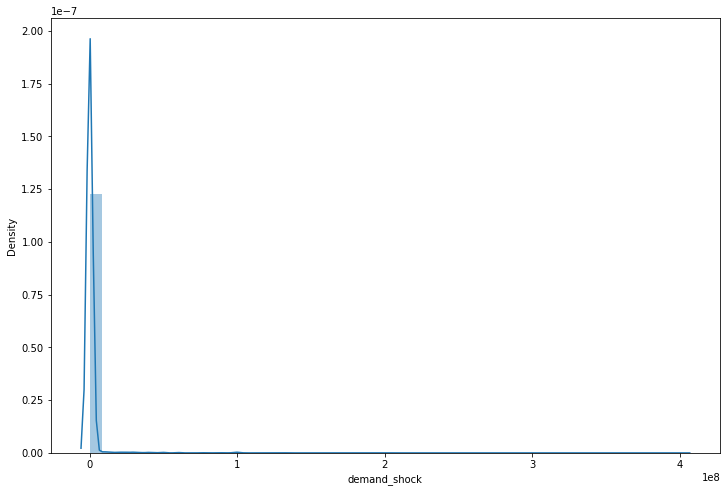

In [30]:
plt.figure(figsize=(12, 8))
sns.distplot(df3['demand_shock'])
plt.show()

<Figure size 1152x864 with 0 Axes>

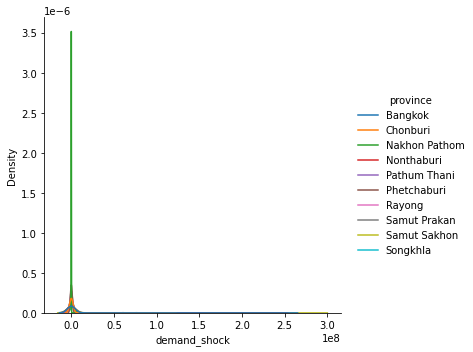

In [31]:
plt.figure(figsize=(16, 12))
biggest_provs = df3.groupby('province').sum()['total_demand'].sort_values().tail(10).index
plot_data = df3[df3.province.isin(biggest_provs)]


sns.displot(data=plot_data, x="demand_shock", hue="province", kind="kde", bw_adjust=0.5, common_norm=False)
# plt.legend()
plt.show()

In [32]:
df3['excess'] = df3['demand_shock'] > 1
excess_frequency = df3.groupby('province').sum()['excess']/df3.groupby('province').count()['excess']
excess_frequency.sort_values(ascending=False).head(10)

province
Bangkok         0.230088
Surat Thani     0.230088
Samut Prakan    0.230088
Nonthaburi      0.221239
Rayong          0.221239
Chonburi        0.212389
Ratchaburi      0.212389
Pathum Thani    0.212389
Phetchaburi     0.203540
Songkhla        0.194690
Name: excess, dtype: float64

In [33]:
df3['demand_shock'].max()
## issue is there can be no variation at all during some period, so denominator is 0 + 1e-6

401000000.0